In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

In [3]:
all_data = pd.read_csv("flights.csv", na_values=['-'], dtype={"ORIGIN_AIRPORT": object, "DESTINATION_AIRPORT": object})
all_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
flights = all_data[[ 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]]
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [6]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]

In [7]:
flights.shape

(5714008, 25)

In [8]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [9]:
flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]] = flights[[ 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]].fillna(0)

In [10]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,320.0,298.0,272.0,2611,819,753.0,-26.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,227.0,215.0,195.0,1617,446,430.0,-16.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,221.0,222.0,197.0,1598,440,432.0,-8.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,161.0,157.0,144.0,1189,340,330.0,-10.0,0,0,NaN,0.0,0.0,0.0,0.0,0.0


In [11]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

In [12]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [13]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]

In [14]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
SCHEDULED_DEPARTURE      int64
SCHEDULED_ARRIVAL        int64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [15]:
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
SCHEDULED_DEPARTURE    0
SCHEDULED_ARRIVAL      0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [16]:
flights['AIRLINE'].value_counts()

AIRLINE
WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: count, dtype: int64

In [17]:
# calculate target feature
flights['all_delay'] = flights[['AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].sum(axis=1)
flights

/var/folders/d3/q7r63p0x09q4w3dftmfmmf3h0000gn/T/ipykernel_14174/3240459348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['all_delay'] = flights[['AIR_SYSTEM_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay
0,2015,1,1,4,AS,5,430,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,10,750,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,20,806,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,20,805,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,25,320,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,2359,819,0.0,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,2359,446,0.0,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,2359,440,0.0,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,2359,340,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
flights['DELAY_REASON'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].idxmax(axis=1), "NO_DELAY")

/var/folders/d3/q7r63p0x09q4w3dftmfmmf3h0000gn/T/ipykernel_14174/2356054511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['DELAY_REASON'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY',


In [19]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delay,DELAY_REASON
0,2015,1,1,4,AS,5,430,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
1,2015,1,1,4,AA,10,750,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
2,2015,1,1,4,US,20,806,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
3,2015,1,1,4,AA,20,805,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
4,2015,1,1,4,AS,25,320,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,2359,819,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819075,2015,12,31,4,B6,2359,446,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819076,2015,12,31,4,B6,2359,440,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
5819077,2015,12,31,4,B6,2359,340,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY


In [20]:
flights['DELAY_REASON'].value_counts()

DELAY_REASON
NO_DELAY               4650569
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

In [21]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'all_delay',
       'DELAY_REASON'],
      dtype='object')

In [22]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'DELAY_REASON']]

In [23]:
flights.shape

(5714008, 8)

In [24]:
# cleaned data
X_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL']]
# cast categorical values
X_flights = pd.get_dummies(X_flights)
y_flights = flights[['DELAY_REASON']]

In [25]:
X_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,430,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,10,750,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,20,806,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,20,805,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,25,320,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,819,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819075,2015,12,31,4,2359,446,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819076,2015,12,31,4,2359,440,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819077,2015,12,31,4,2359,340,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.30, random_state=15)

In [27]:
y_train.value_counts()

DELAY_REASON       
NO_DELAY               3255216
LATE_AIRCRAFT_DELAY     287400
AIRLINE_DELAY           218072
AIR_SYSTEM_DELAY        212647
WEATHER_DELAY            25128
SECURITY_DELAY            1342
Name: count, dtype: int64

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [29]:
y_resampled.value_counts()

DELAY_REASON       
AIRLINE_DELAY          3255216
AIR_SYSTEM_DELAY       3255216
LATE_AIRCRAFT_DELAY    3255216
NO_DELAY               3255216
SECURITY_DELAY         3255216
WEATHER_DELAY          3255216
Name: count, dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(X_train, y_train)

In [31]:
y_predictions = classifier.predict(X_test)
y_predictions

array(['AIRLINE_DELAY', 'NO_DELAY', 'AIRLINE_DELAY', ..., 'NO_DELAY',
       'NO_DELAY', 'NO_DELAY'], dtype=object)

In [32]:
classifier.score(X_test, y_test)

0.6905115671831166

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictions, labels=classifier.classes_)

In [34]:
cm

array([[   8849,    6447,   10162,   66940,      36,     880],
       [   6729,   13178,    8948,   61054,      43,    1185],
       [  10897,    9312,   22154,   79365,      39,    1480],
       [  82067,   72585,   94175, 1138676,     511,    7339],
       [     54,      29,      50,     417,      11,       8],
       [    834,    1138,    1407,    6391,       4,     809]])

<Axes: >

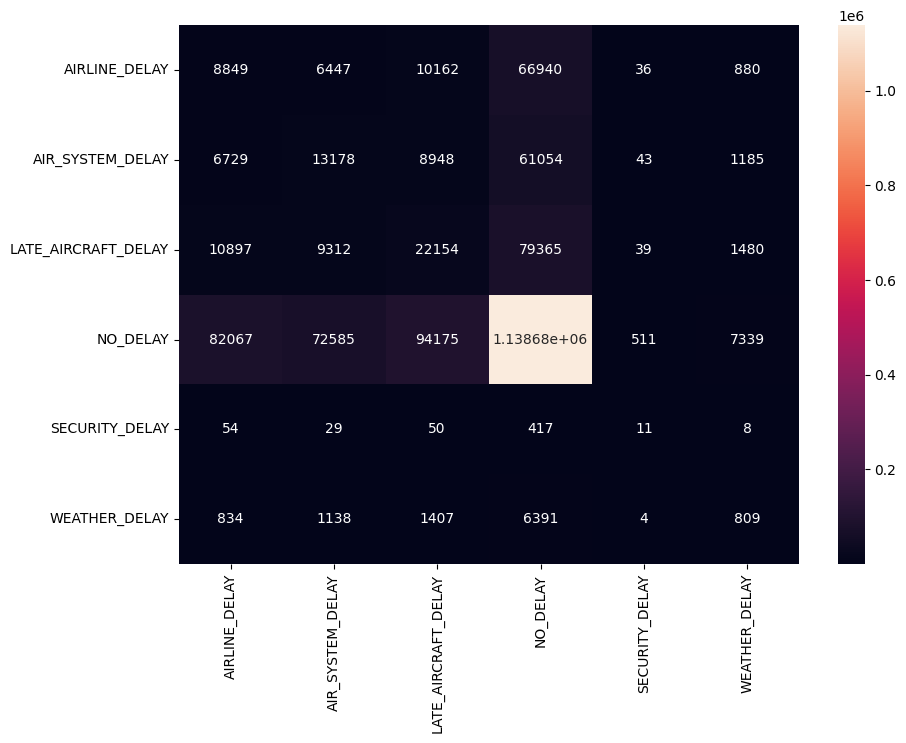

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=classifier.classes_, yticklabels=classifier.classes_)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=0)
# cross_val_score(clf, X_flights, np.ravel(y_flights.values), cv=10)

In [38]:
# clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
# cross_val_score(clf, X_flights, np.ravel(y_flights.values), cv=10)

In [39]:
# clf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
# cross_val_score(clf, X_flights, np.ravel(y_flights.values), cv=10)